# Initialize Library

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='once')

from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'


# Initialize Dataframe

In [17]:
df = pd.read_csv('german.data', delimiter=" ", header=None)
df.columns = [
  "status_existing_checking",
  "duration_month",
  "credit_history",
  "purpose",
  "credit_amount",
  "saving account/bonds",
  "employment_duration",
  "installment_rate",
  "status_sex",
  "other_debtors_guarantors",
  "duration_residency",
  "property",
  "age",
  "installment_plans",
  "housing_status",
  "number_of_existing_credits",
  "job",
  "number_of_people_to_provide_maintenance",
  "phone",
  "is_foreign_worker",
  "target"
]
df.sample(5)

,status_existing_checking,duration_month,credit_history,purpose,credit_amount,saving account/bonds,employment_duration,installment_rate,status_sex,other_debtors_guarantors,...,property,age,installment_plans,housing_status,number_of_existing_credits,job,number_of_people_to_provide_maintenance,phone,is_foreign_worker,target
867,A14,12,A34,A42,3331,A61,A75,2,A93,A101,...,A122,42,A142,A152,1,A173,1,A191,A201,1
662,A14,21,A32,A42,2241,A61,A75,4,A93,A101,...,A121,50,A143,A152,2,A173,1,A191,A201,1
861,A14,18,A33,A49,2169,A61,A73,4,A94,A101,...,A123,28,A143,A152,1,A173,1,A192,A201,2
30,A12,18,A32,A49,1913,A64,A72,3,A94,A101,...,A121,36,A141,A152,1,A173,1,A192,A201,1
829,A12,48,A33,A49,6681,A65,A73,4,A93,A101,...,A124,38,A143,A153,1,A173,2,A192,A201,1


# Descriptive Statistic

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   status_existing_checking                 1000 non-null   object
 1   duration_month                           1000 non-null   int64 
 2   credit_history                           1000 non-null   object
 3   purpose                                  1000 non-null   object
 4   credit_amount                            1000 non-null   int64 
 5   saving account/bonds                     1000 non-null   object
 6   employment_duration                      1000 non-null   object
 7   installment_rate                         1000 non-null   int64 
 8   status_sex                               1000 non-null   object
 9   other_debtors_guarantors                 1000 non-null   object
 10  duration_residency                       1000 non-null   int6

In [19]:
df.isna().sum()

status_existing_checking                   0
duration_month                             0
credit_history                             0
purpose                                    0
credit_amount                              0
saving account/bonds                       0
employment_duration                        0
installment_rate                           0
status_sex                                 0
other_debtors_guarantors                   0
duration_residency                         0
property                                   0
age                                        0
installment_plans                          0
housing_status                             0
number_of_existing_credits                 0
job                                        0
number_of_people_to_provide_maintenance    0
phone                                      0
is_foreign_worker                          0
target                                     0
dtype: int64

In [20]:
df.duplicated().sum()

0

as see on the descriptive information above, there's no null value and no duplicated data

# Sneak Peek into the Data

In [39]:
n = [1,4,7,10,12,15,17,20]
c = [0,2,3,5,6,8,9,11,13,14,16,18,19]

numericals = []
categoricals = []
for i, col in enumerate(df.columns):
  if i in n:
    numericals.append(col)
  else:
    categoricals.append(col)

print('total numerical features:', len(numericals))
print('total categorical features:', len(categoricals))

total numerical features: 8
total categorical features: 13


In [35]:
df[numericals].describe()

,duration_month,credit_amount,installment_rate,duration_residency,age,number_of_existing_credits,number_of_people_to_provide_maintenance,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


In [36]:
df[categoricals].describe()

,status_existing_checking,credit_history,purpose,saving account/bonds,employment_duration,status_sex,other_debtors_guarantors,property,installment_plans,housing_status,job,phone,is_foreign_worker
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,4,5,10,5,5,4,3,4,3,3,4,2,2
top,A14,A32,A43,A61,A73,A93,A101,A123,A143,A152,A173,A191,A201
freq,394,530,280,603,339,548,907,332,814,713,630,596,963


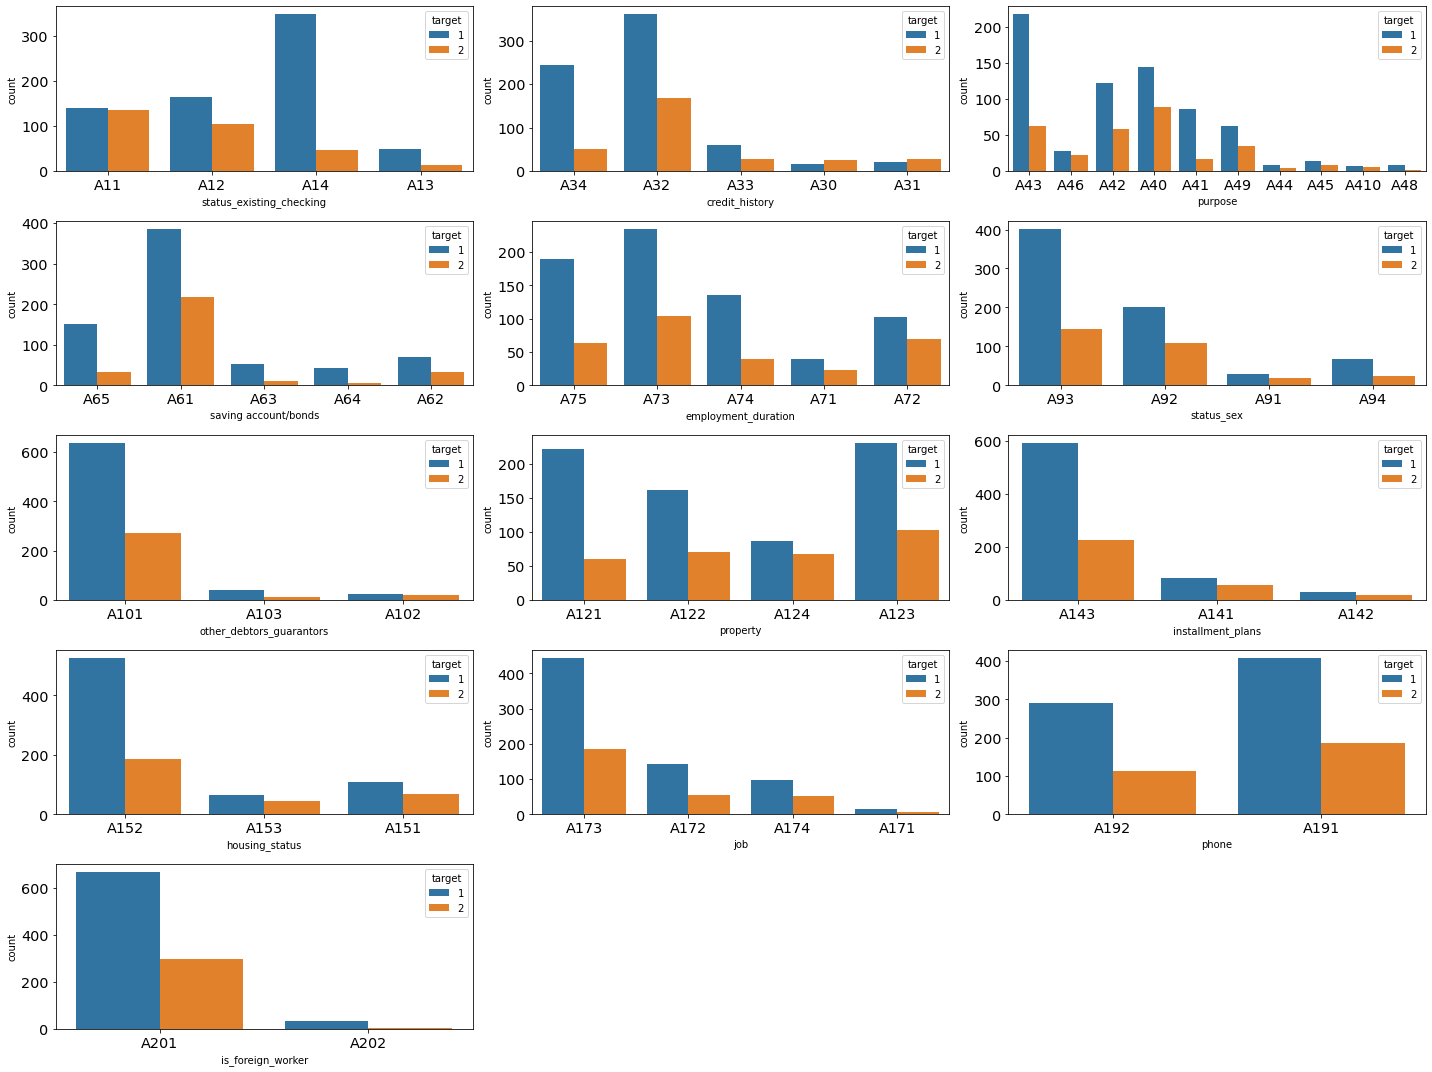

In [45]:
plt.figure(figsize=(20, 15))
for i in range(0, len(categoricals)):
    plt.subplot(5, 3, i+1)
    sns.countplot(x = df[categoricals[i]], orient='v', hue=df['target'])
    plt.tight_layout()

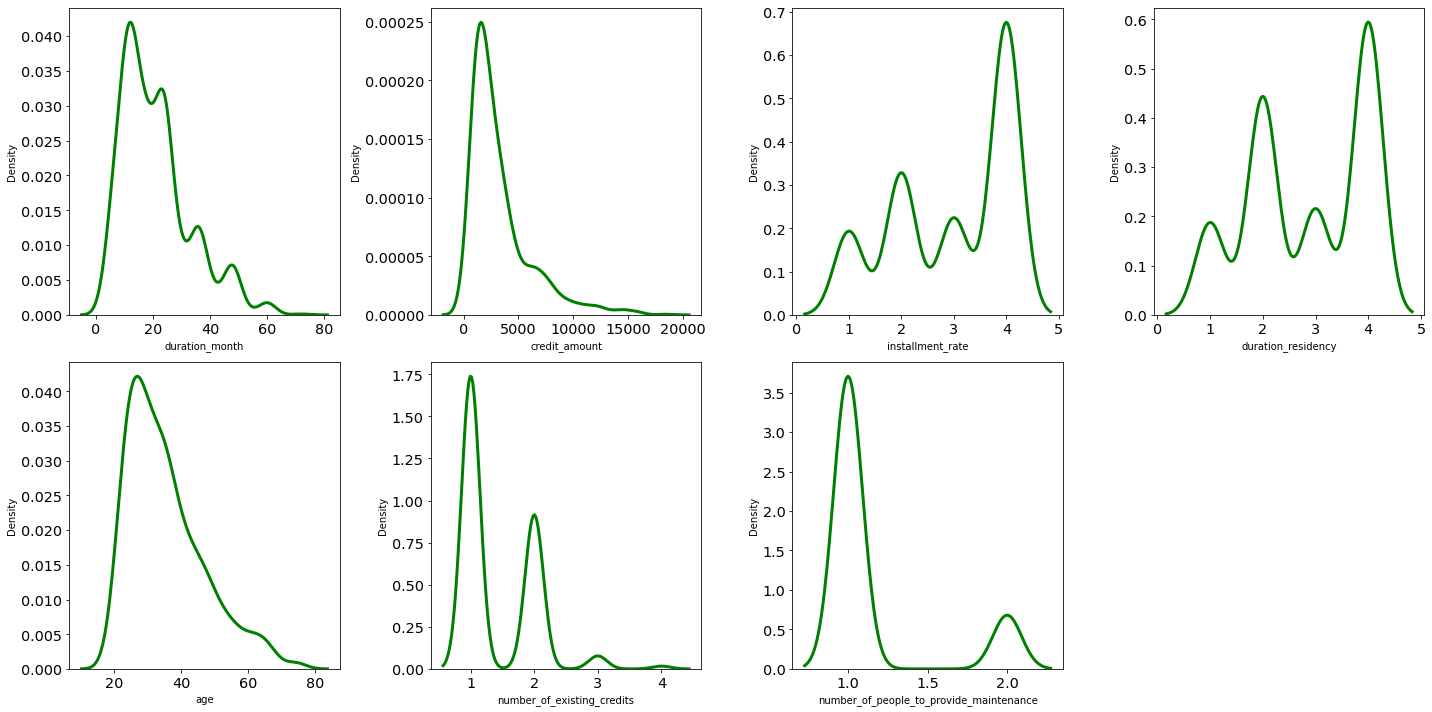

In [49]:
plt.figure(figsize=(20, 10))
for i in range(0, len(numericals)):
  if i == len(numericals) - 1:
    continue
  plt.subplot(2, 4, i+1)
  sns.kdeplot(x=df[numericals[i]], color='green')
  plt.xlabel(numericals[i])
  plt.tight_layout()